In [1]:
# Author: Yichun Zhao

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import imutils
import cv2

In [2]:
# load keras model
model_loaded = keras.models.load_model(os.path.abspath('')+"/model")

In [3]:
# evaluation
print("\n-----------------------EVALUATION-----------------------\n")

images_eva = []
labels_eva = []

yes_path = os.path.abspath('')+"/dataset/evaluate/yes/"
for file in os.listdir(yes_path):
    image = cv2.imread(yes_path+file, cv2.IMREAD_GRAYSCALE)
    # resize images to same size
    image = cv2.resize(image, (224, 224))
    images_eva.append(image)
    labels_eva.append(True)
    
no_path = os.path.abspath('')+"/dataset/evaluate/no/"
for file in os.listdir(no_path):
    image = cv2.imread(no_path+file, cv2.IMREAD_GRAYSCALE)
    # resize images to same size
    image = cv2.resize(image, (224, 224))
    images_eva.append(image)
    labels_eva.append(False)
    
# normalize and reshape into appropriate dimensions
images_eva = np.array(images_eva)/255
images_eva = images_eva.reshape(images_eva.shape[0], images_eva.shape[1], images_eva.shape[2], 1) #TF needs 4D shaped data
labels_eva = np.array(labels_eva) * 1
labels_eva = labels_eva.reshape(labels_eva.shape[0], -1) #2D output data

predicted_correct = 0
pred = model_loaded.predict(images_eva)
for i in range(len(images_eva)):
    print("Image #",i,": Correct output: ", labels_eva[i][0], "; Predicted output: ", int(round(pred[i][0])))
    if (labels_eva[i][0]==round(pred[i][0])):
        predicted_correct = predicted_correct + 1
    
print("\nAccuracy from evaluation using trained model: ", predicted_correct/len(images_eva)*100, "\n\n")


-----------------------EVALUATION-----------------------

Image # 0 : Correct output:  1 ; Predicted output:  1
Image # 1 : Correct output:  1 ; Predicted output:  0
Image # 2 : Correct output:  1 ; Predicted output:  1
Image # 3 : Correct output:  1 ; Predicted output:  1
Image # 4 : Correct output:  1 ; Predicted output:  0
Image # 5 : Correct output:  0 ; Predicted output:  0
Image # 6 : Correct output:  0 ; Predicted output:  0
Image # 7 : Correct output:  0 ; Predicted output:  0
Image # 8 : Correct output:  0 ; Predicted output:  0
Image # 9 : Correct output:  0 ; Predicted output:  0

Accuracy from evaluation using trained model:  80.0 





-----------------------VISUALIZATION-----------------------

Correct output:  [[1]] 

conv2d_2_input (1, 224, 224, 1) 


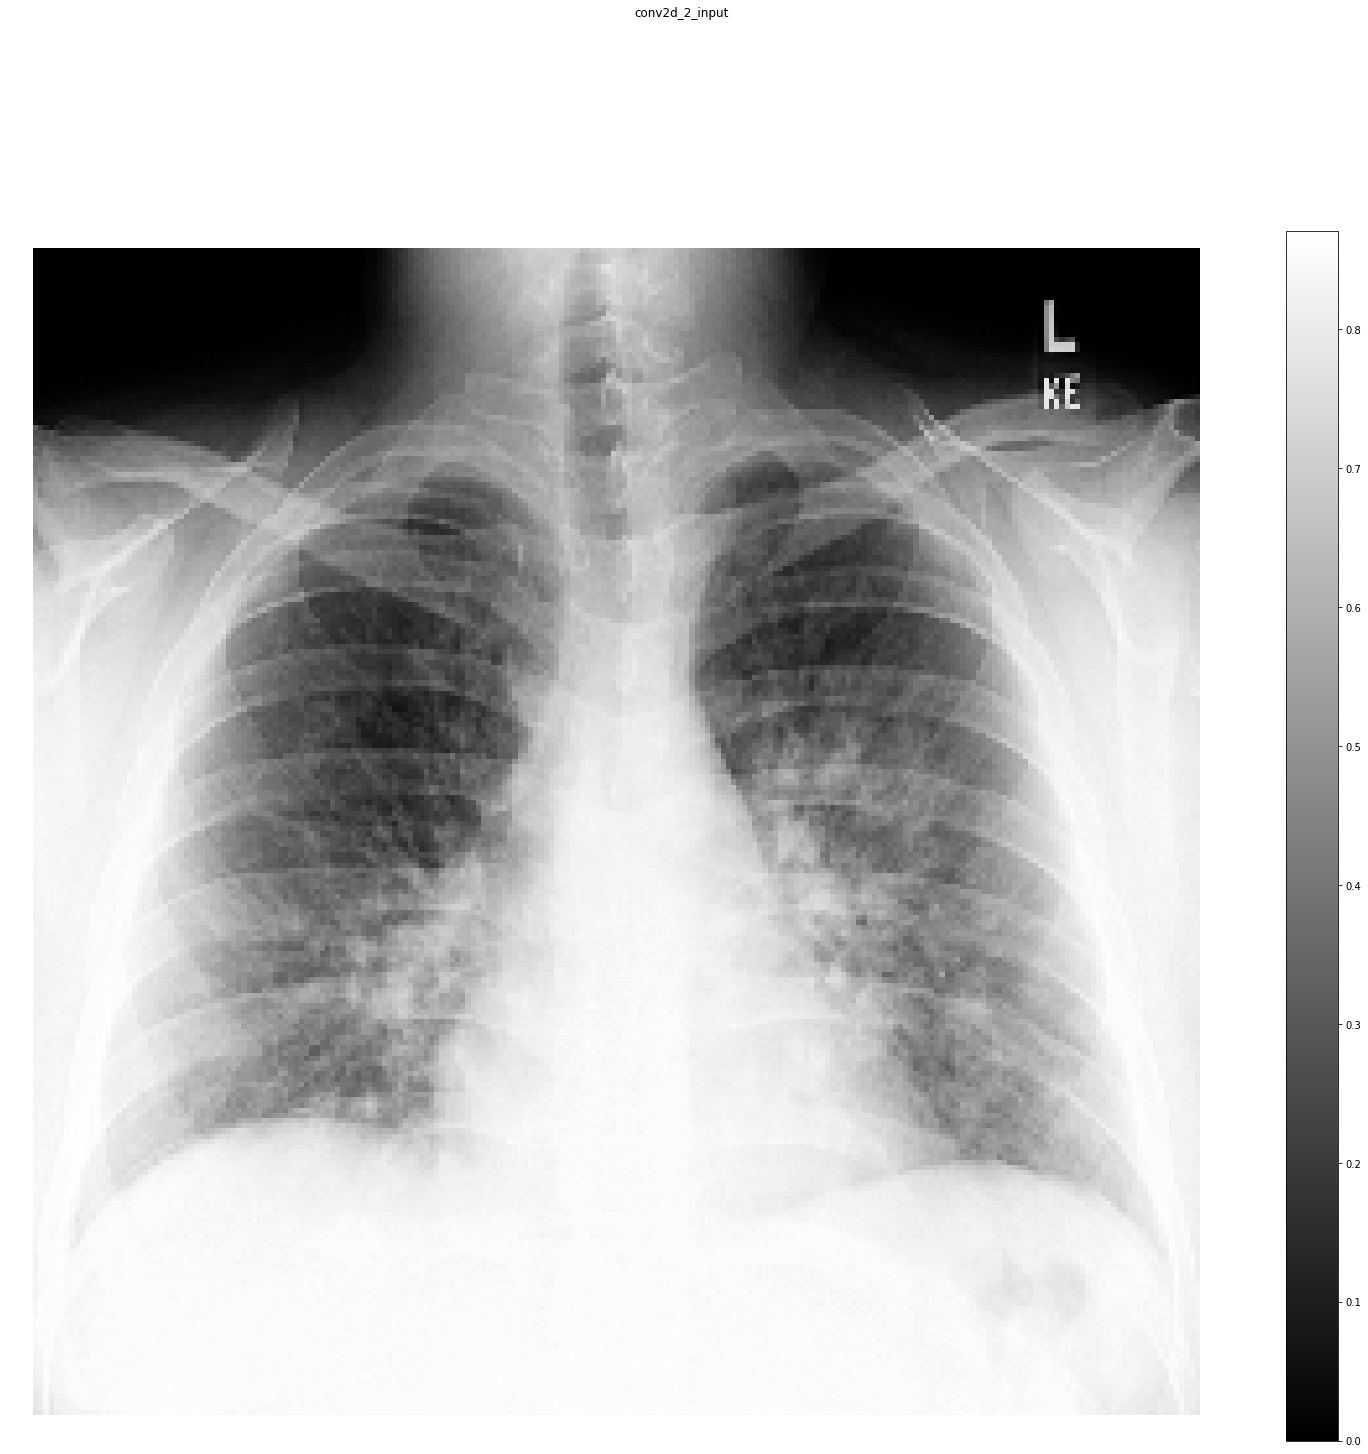

conv2d_2 (1, 224, 224, 9) 


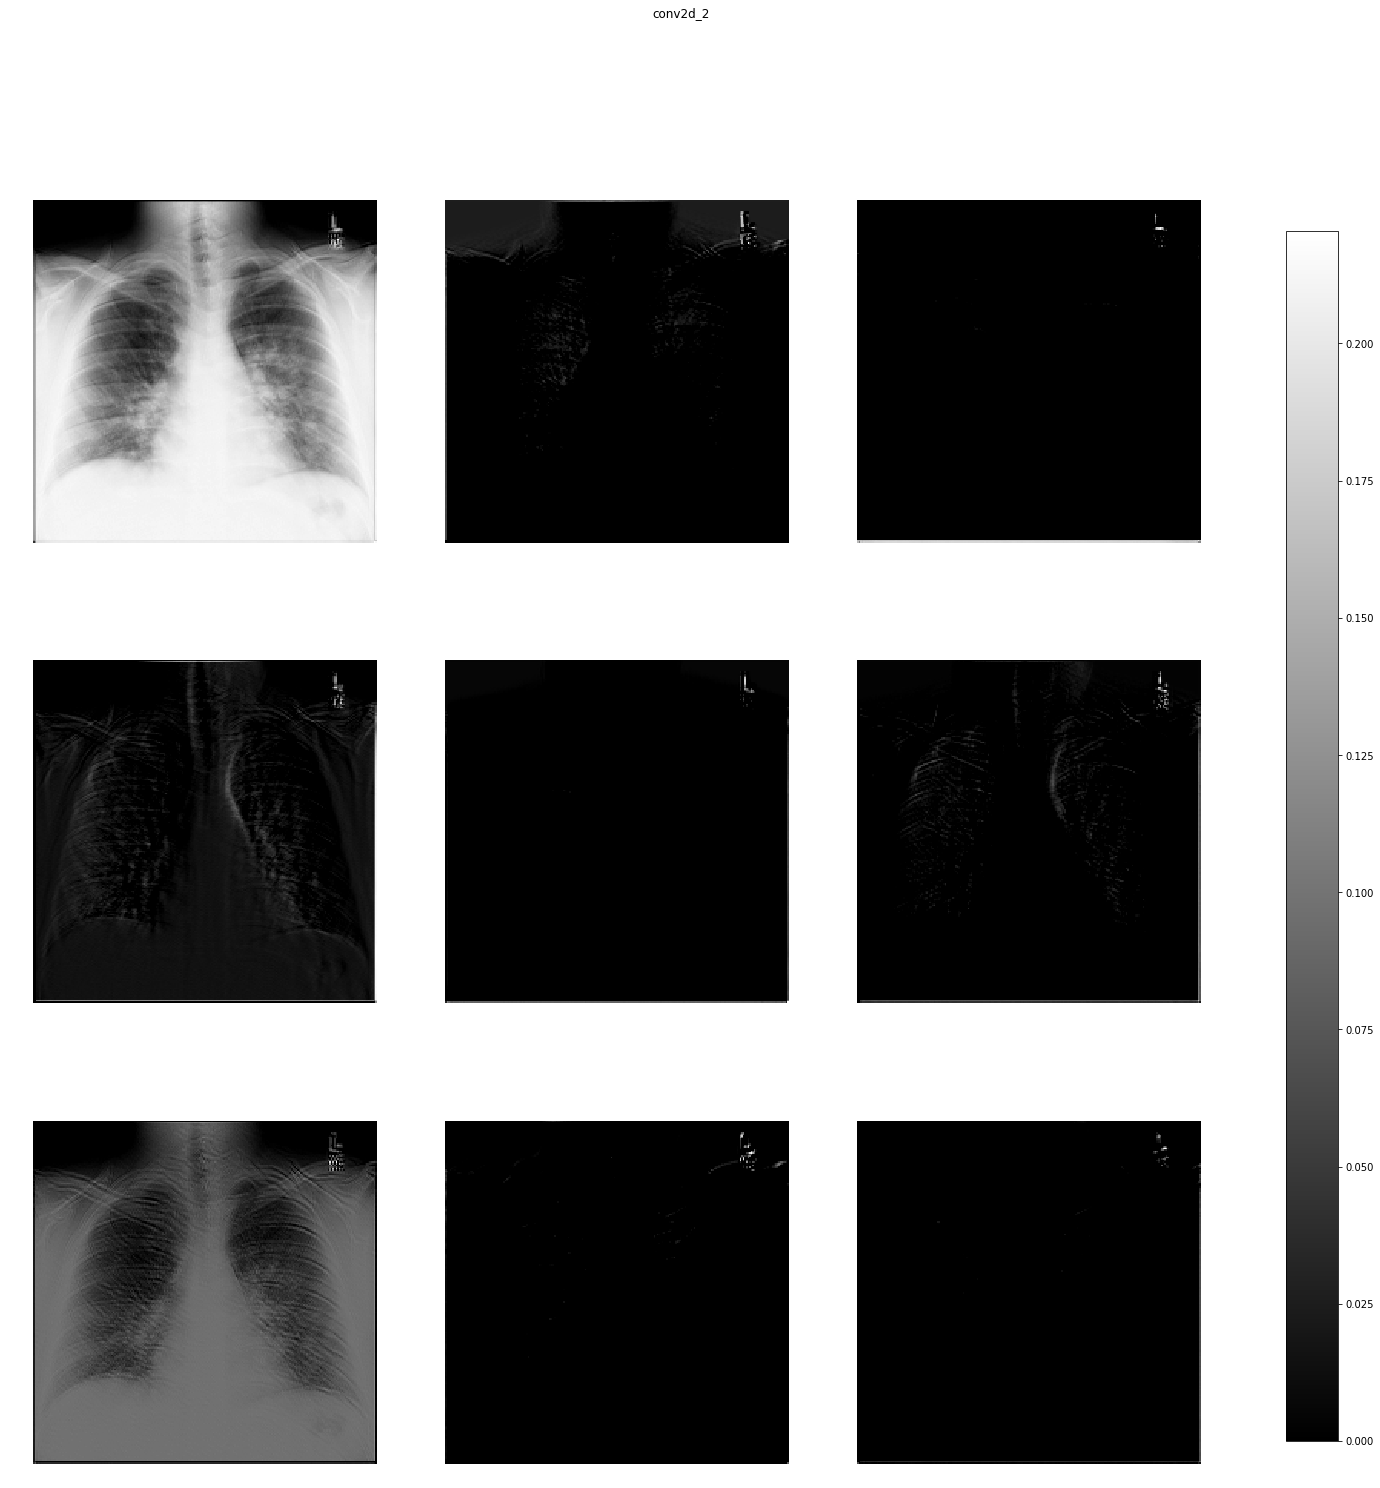

max_pooling2d_1 (1, 112, 112, 9) 


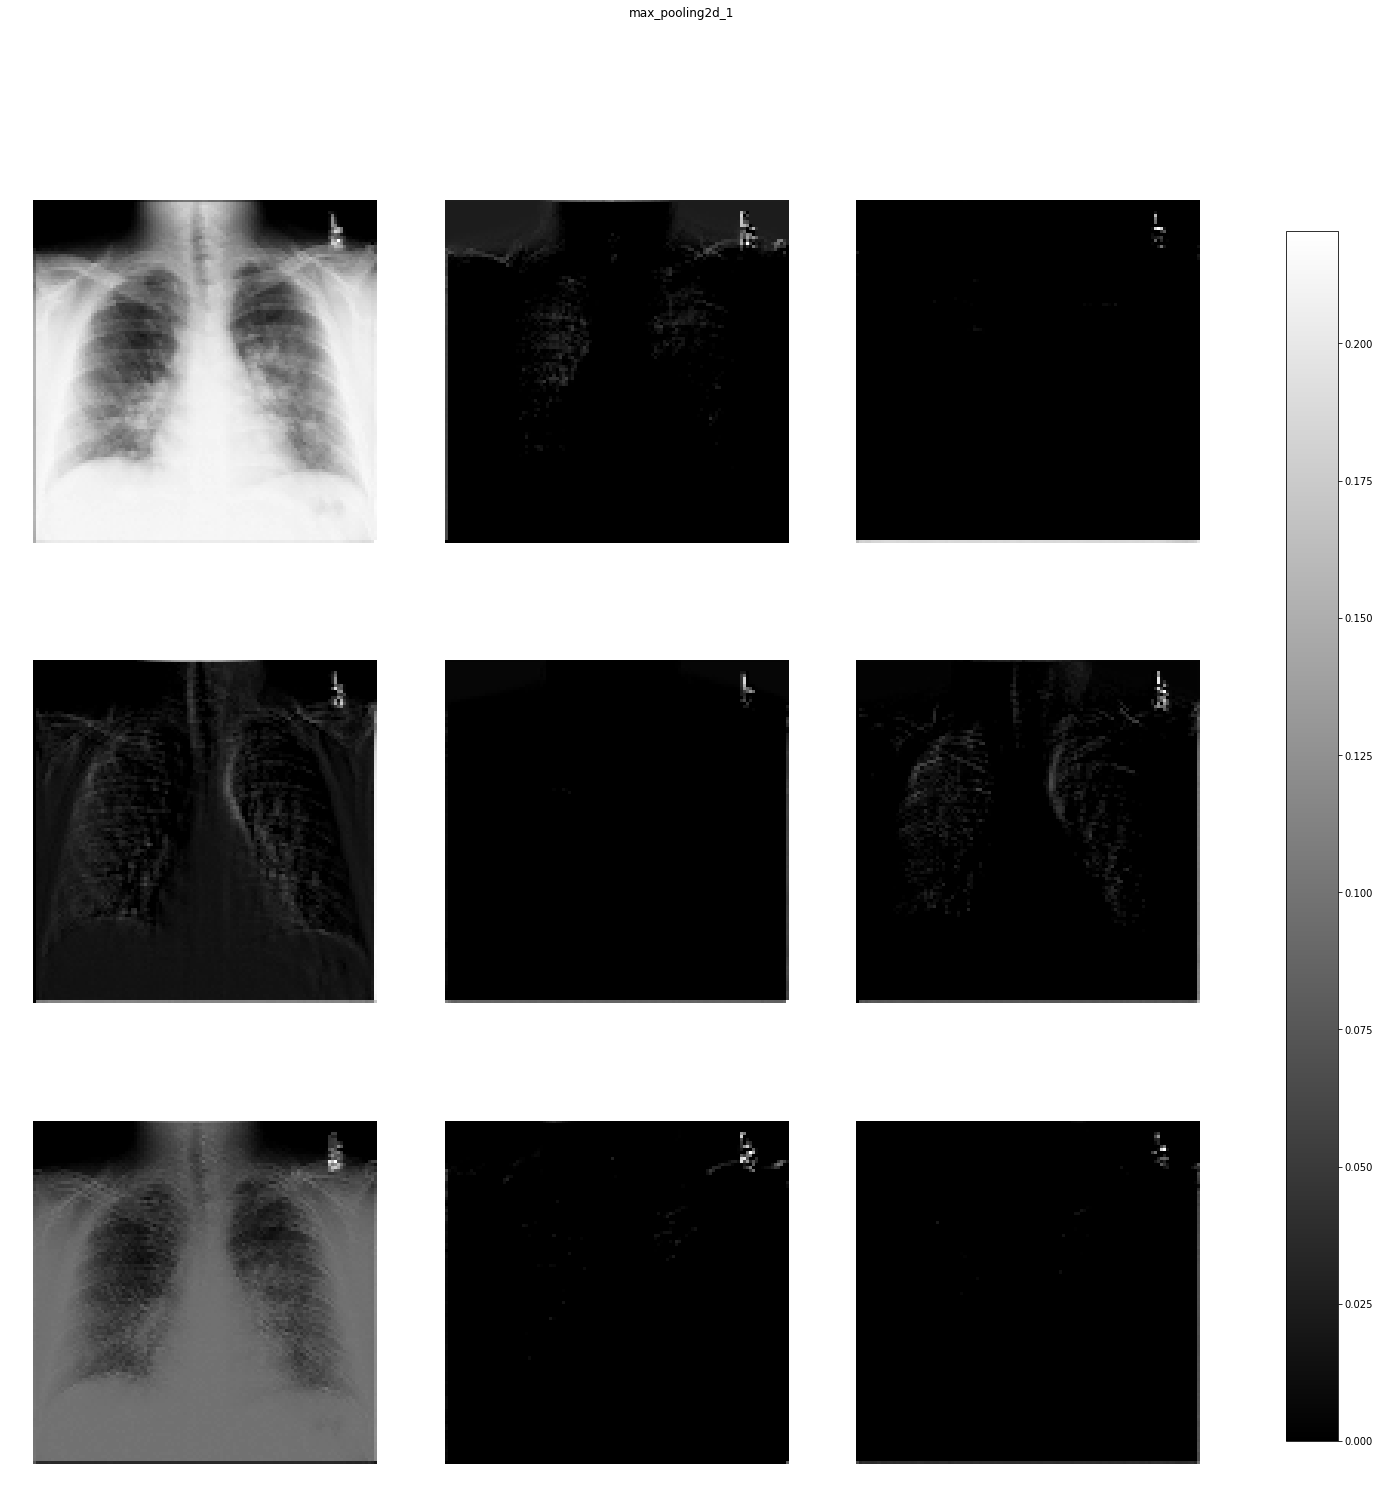

conv2d_3 (1, 112, 112, 16) 


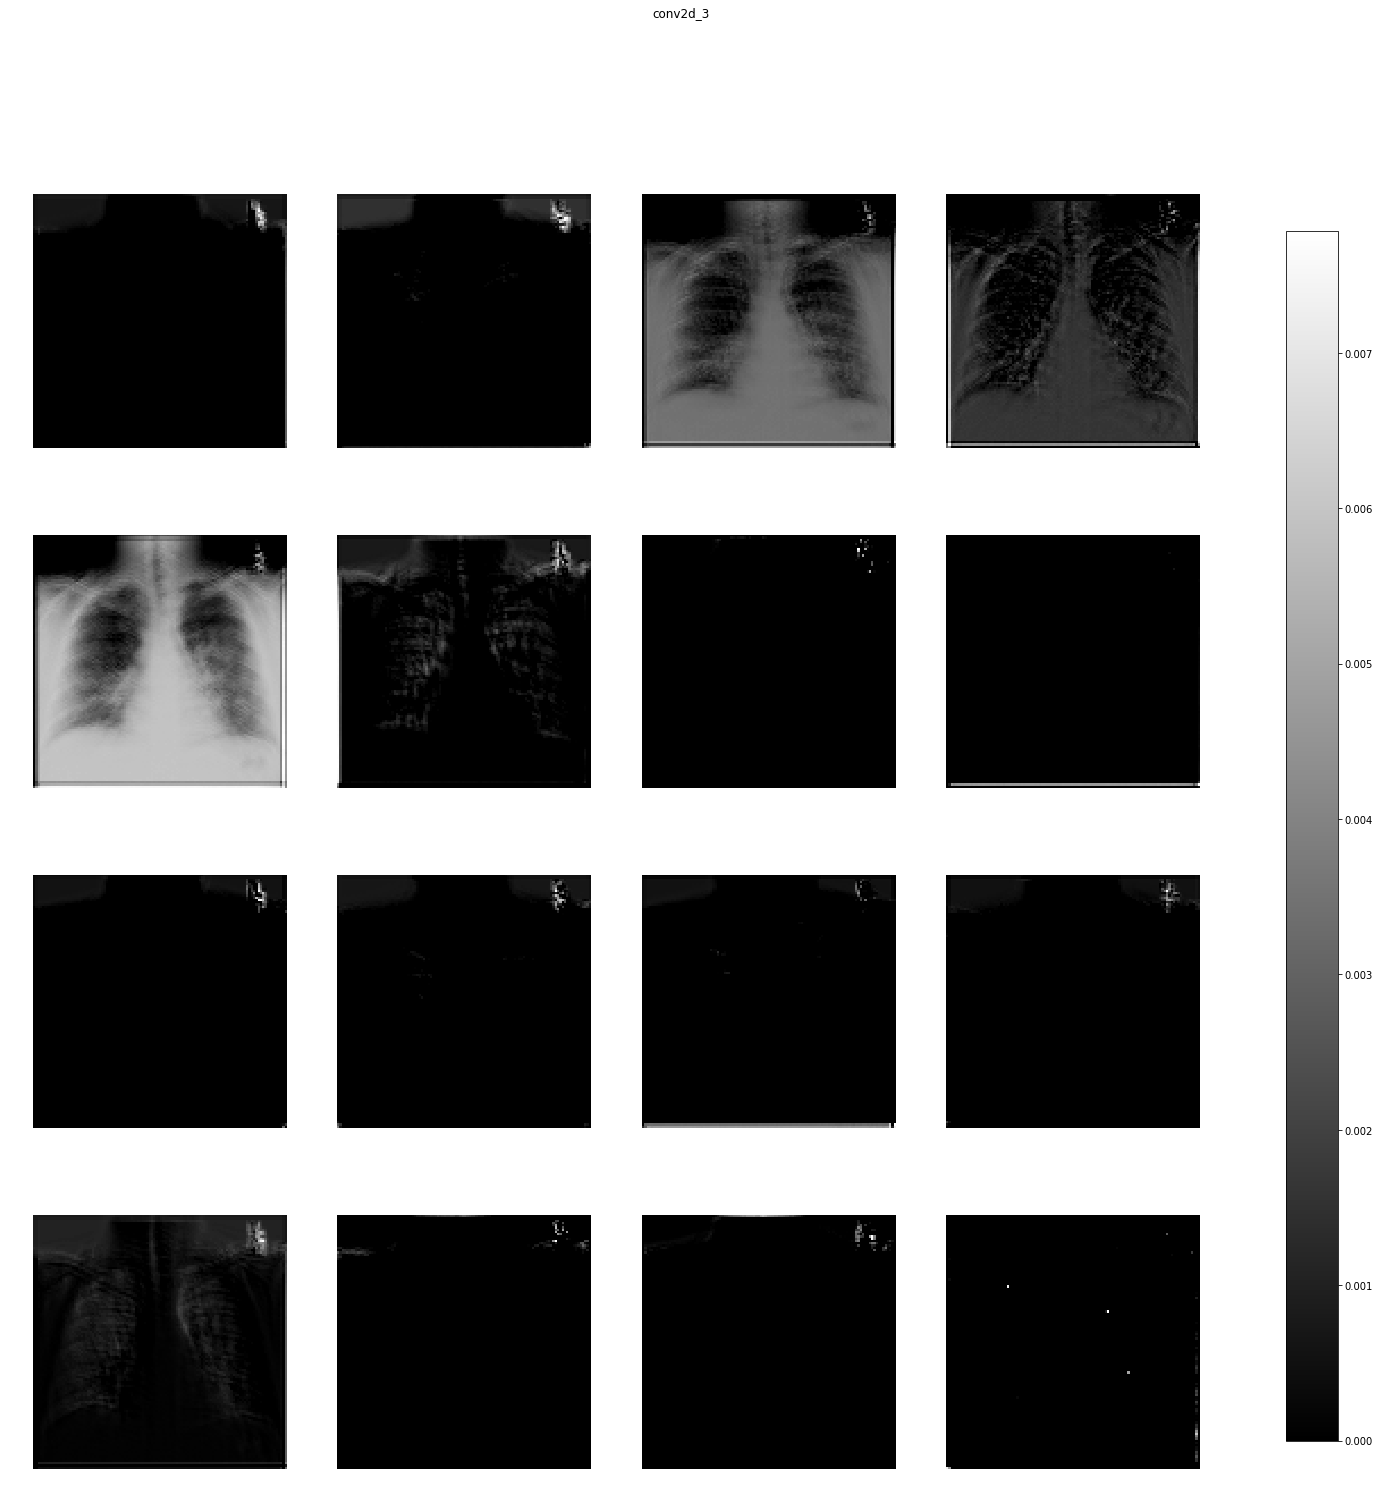

flatten_1 (1, 200704) 


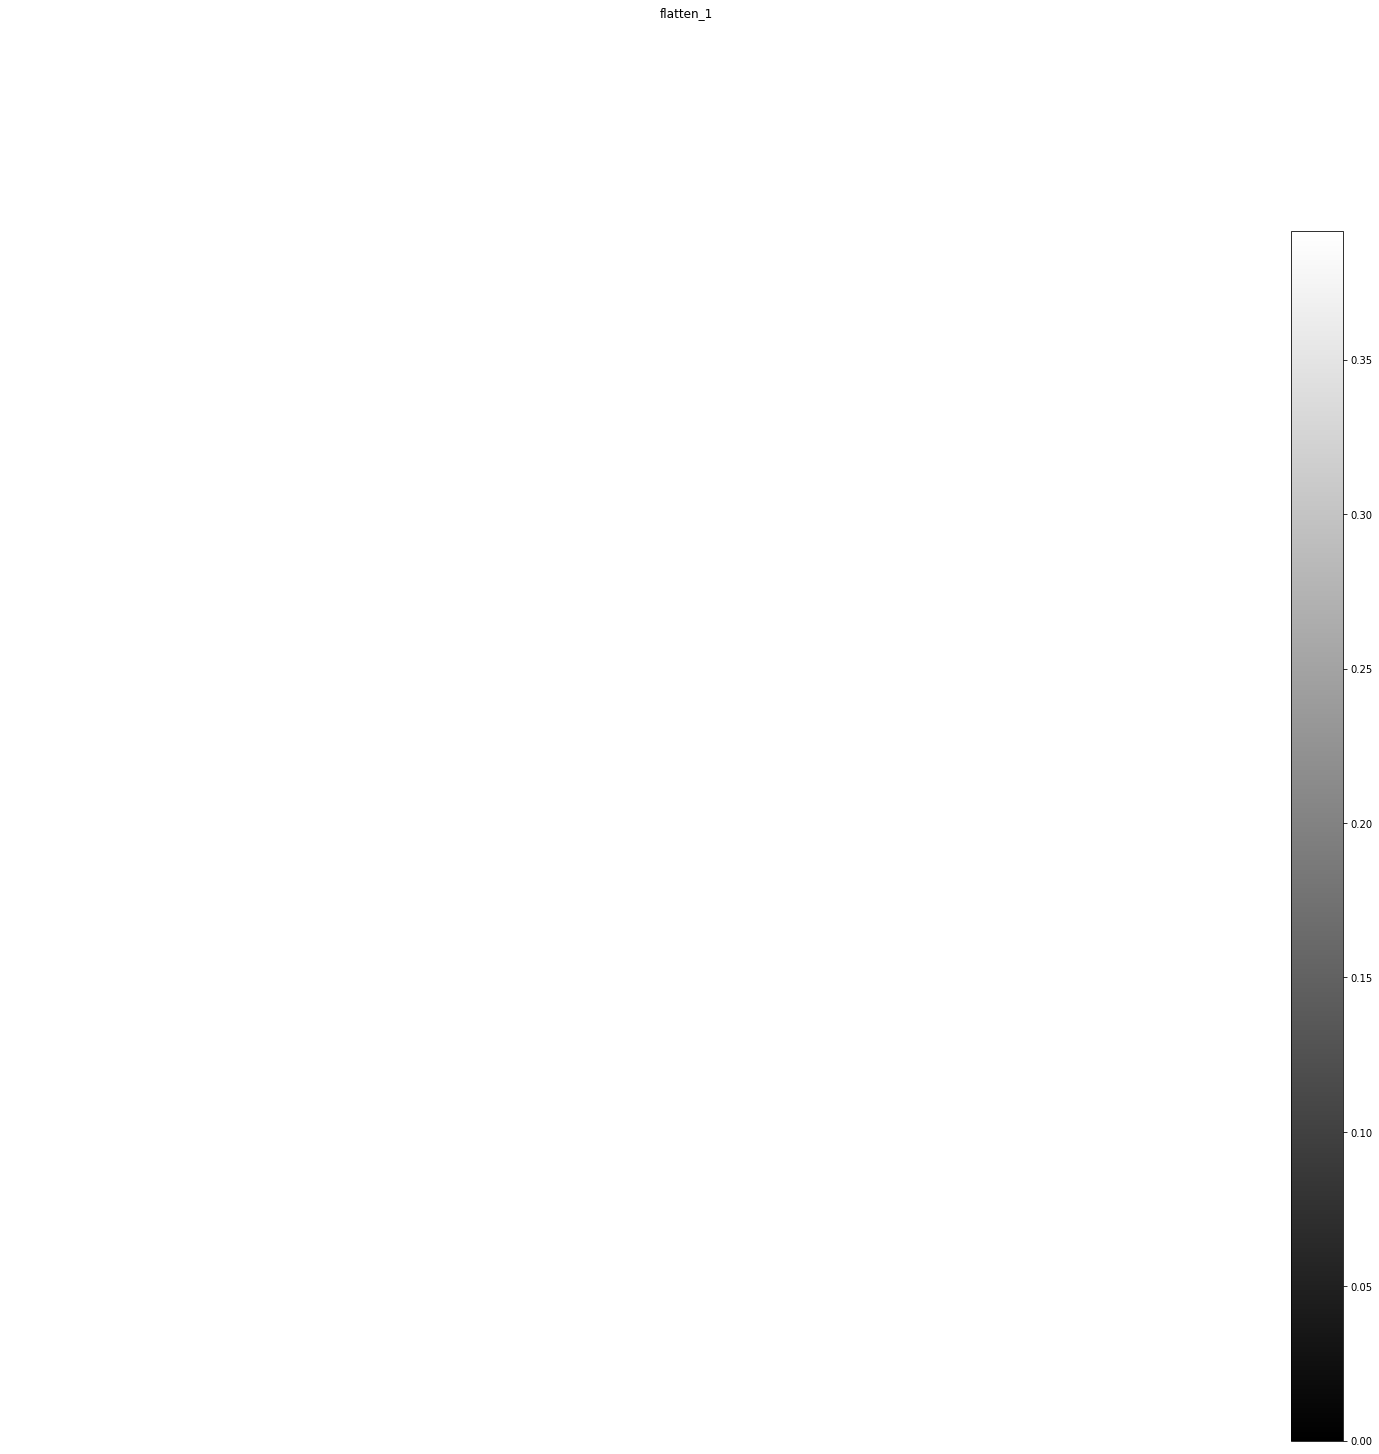

dense_2 (1, 256) 


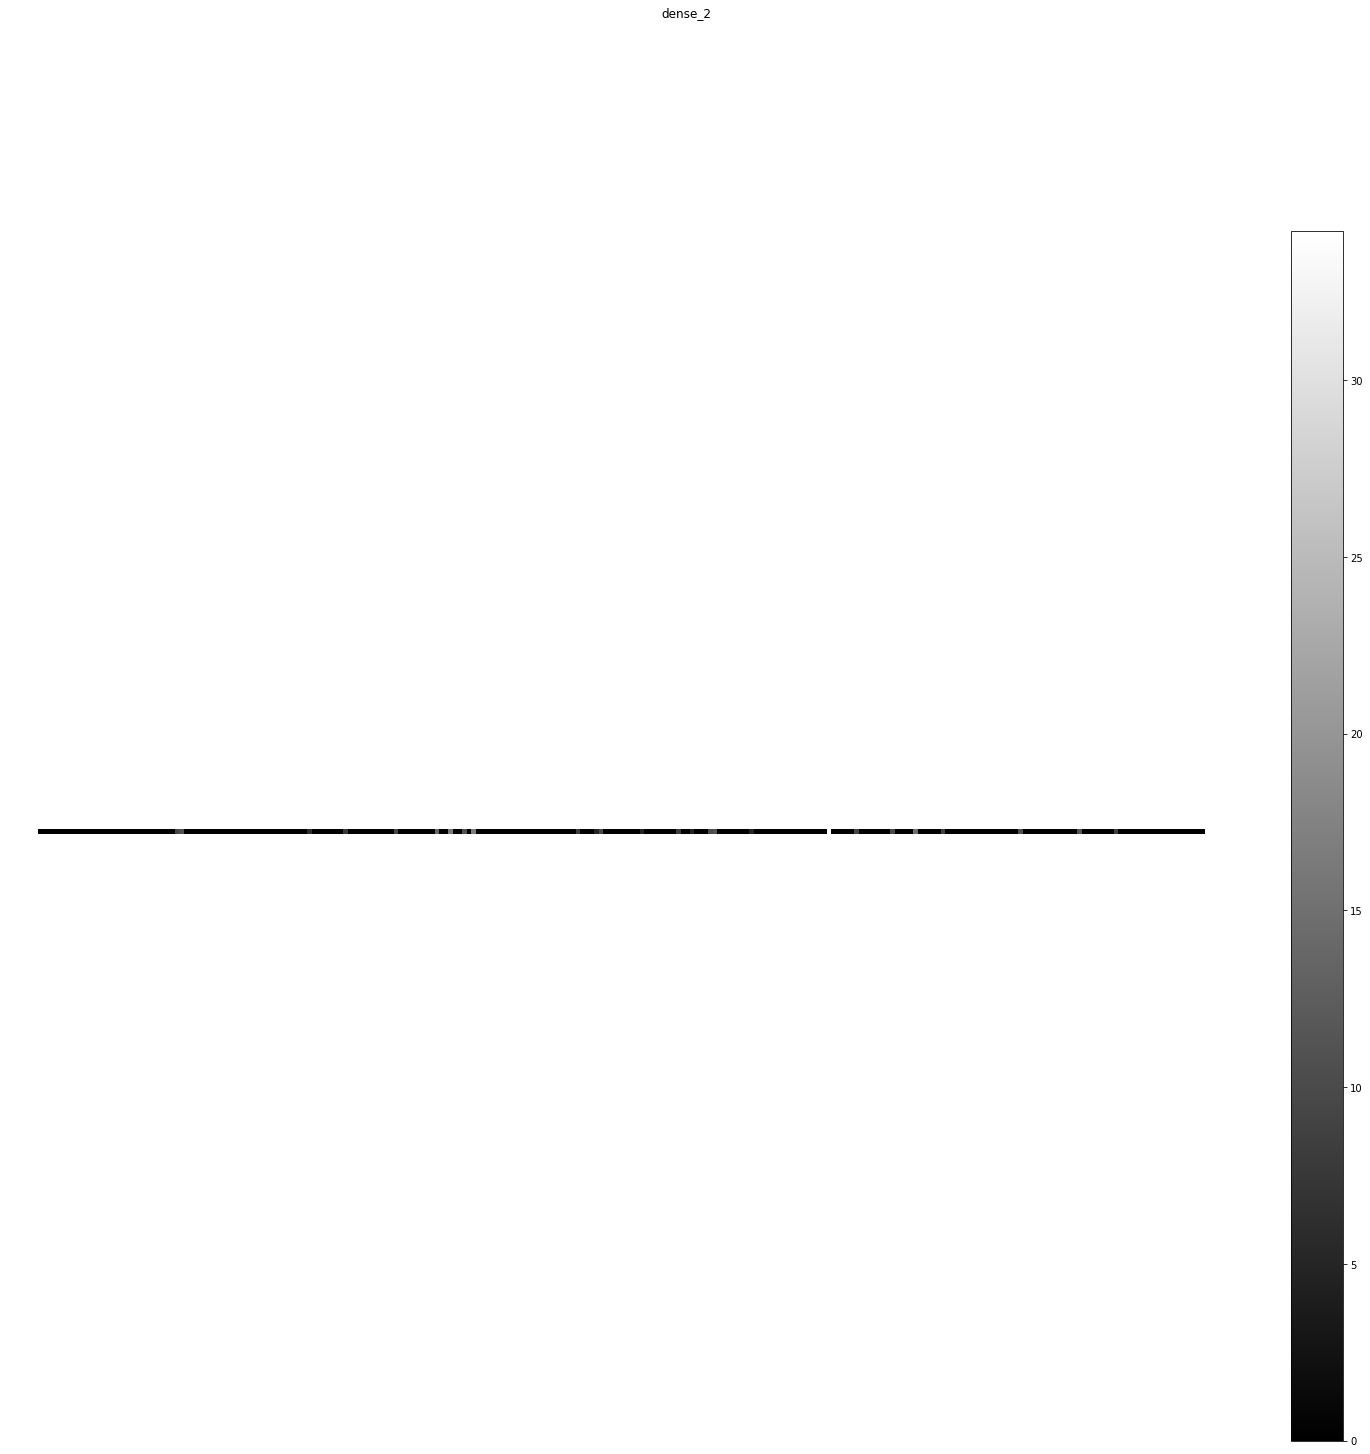

dense_3 (1, 1) 


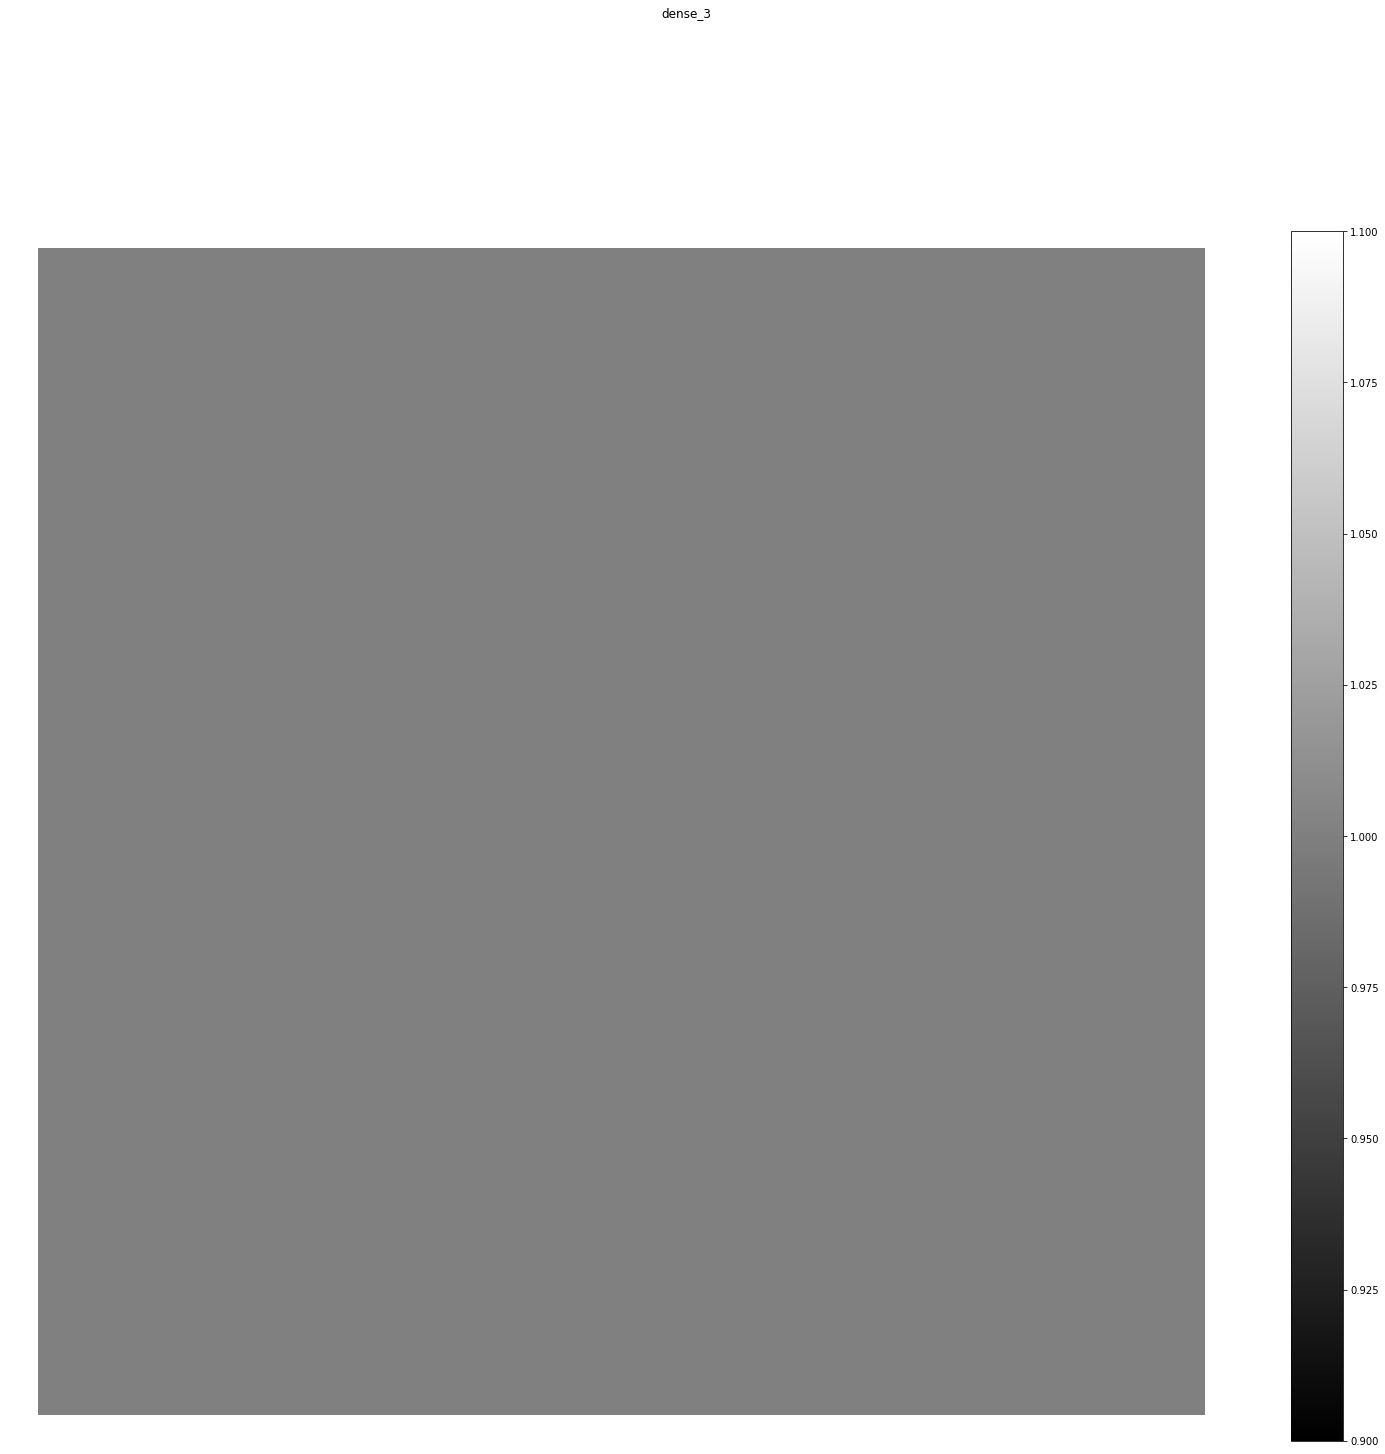

conv2d_2_input (1, 224, 224, 1) 


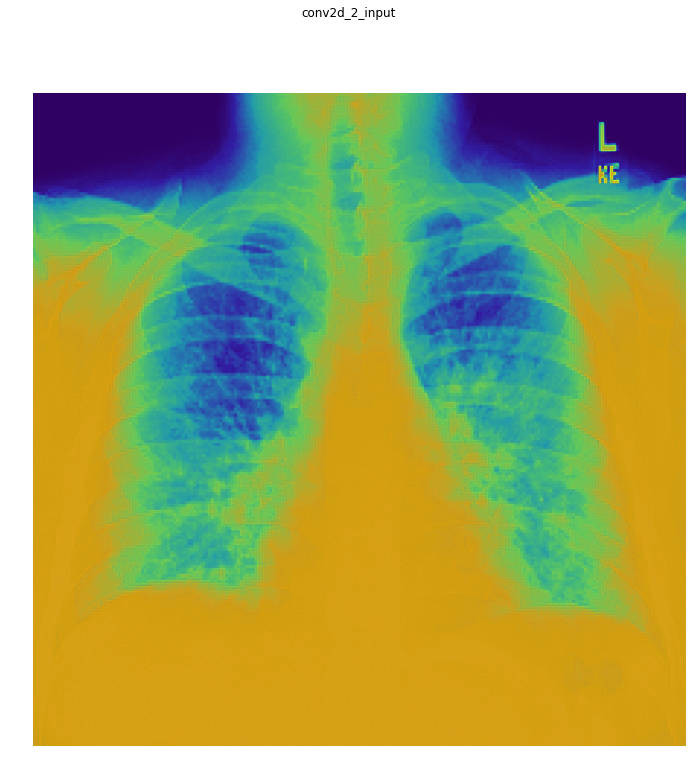

conv2d_2 (1, 224, 224, 9) 


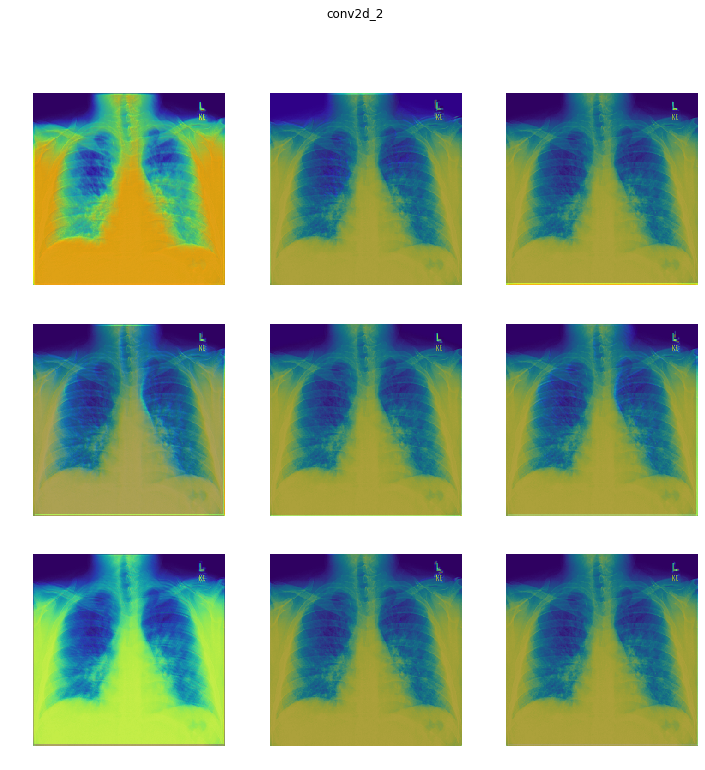

max_pooling2d_1 (1, 112, 112, 9) 


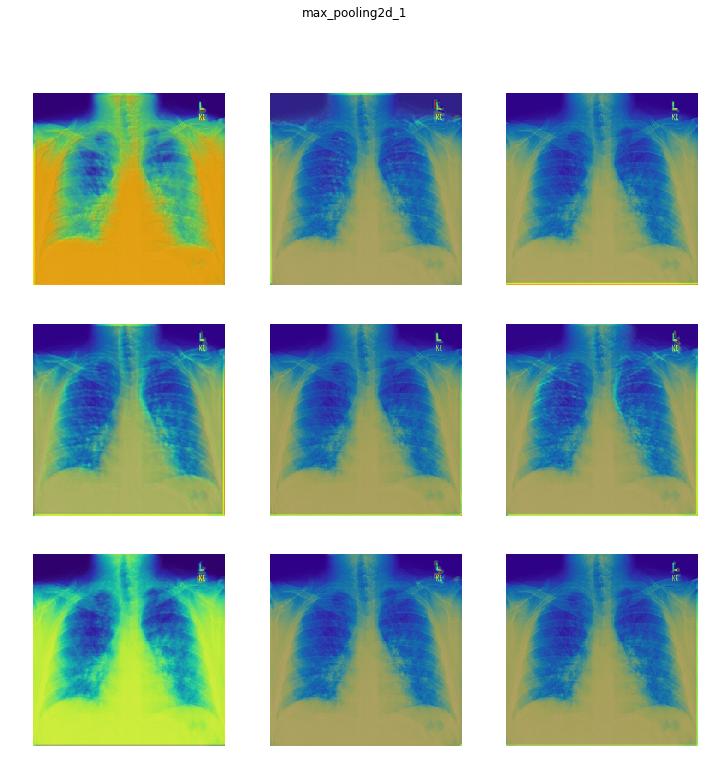

conv2d_3 (1, 112, 112, 16) 


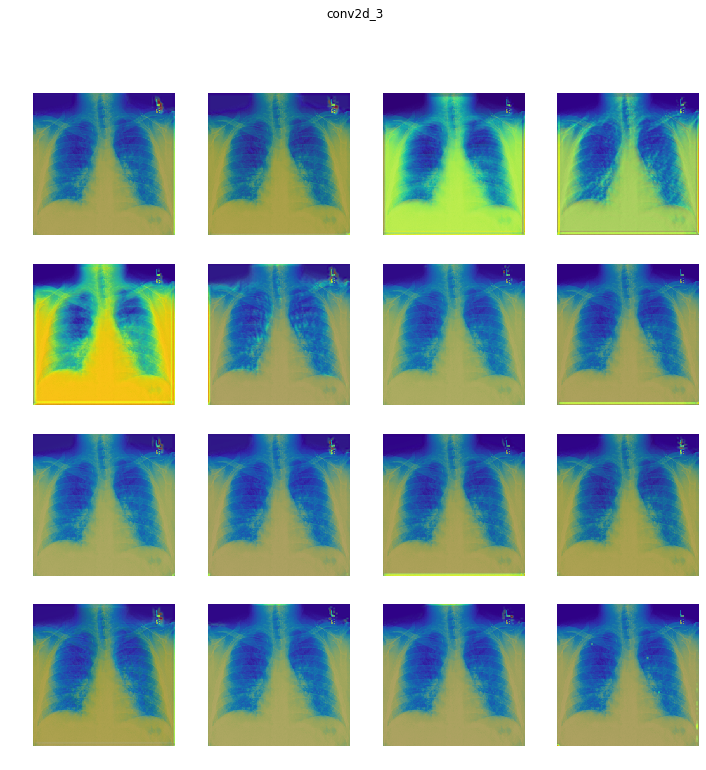

flatten_1 (1, 200704) -> Skipped. 2D Activations.
dense_2 (1, 256) -> Skipped. 2D Activations.
dense_3 (1, 1) -> Skipped. 2D Activations.


In [4]:
# visualization of feature maps - what features do the machine see?
print("\n-----------------------VISUALIZATION-----------------------\n")
from keract import get_activations, display_activations, display_heatmaps
keract_inputs = images_eva[0:1]
keract_targets = labels_eva[0:1]
print("Correct output: ", keract_targets, "\n")
activations = get_activations(model_loaded, keract_inputs)
display_activations(activations, cmap="gray", save=False)
display_heatmaps(activations, keract_inputs, save=False)